In [ ]:
# IMPORTS

import os
import cv2
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical, plot_model
from tensorflow.keras.metrics import Precision, Recall
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.applications import Xception  # Import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.applications import MobileNet  # Import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.applications import MobileNet  # Import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [2]:
# FUNCTIONS 

def evaluate_model(model, test_images, test_labels):
    """
    Evaluates the given model using test data and prints accuracy, precision, recall, and F1 score.

    Parameters:
    - model: Trained model to be evaluated
    - test_images: Test images to evaluate the model
    - test_labels: Correct labels for the test images

    Returns:
    - None: Prints the evaluation metrics directly.
    """

    test_metrics = model.evaluate(test_images, test_labels)
    accuracy = test_metrics[1]
    precision = test_metrics[2]
    recall = test_metrics[3]
    
    # Calculate F1 score
    if (precision + recall) == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    # Print metrics
    print('Test accuracy:', accuracy)
    print('Test precision:', precision)
    print('Test recall:', recall)
    print('Test F1 Score:', f1_score)

# Usage:
# evaluate_model(model, combined_images_test, labels_test)


def plot_training_history(history):
    """
    Plot the training history of a model.
    
    This function visualizes the training and validation accuracy and loss 
    over the epochs to help in analyzing the model's performance during training.

    Parameters:
    - history (History): The history object returned from the training of a model.

    Returns:
    - None: Shows the plots.
    """
    
    # Create a figure with two subplots: one for accuracy and another for loss
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot training and validation accuracy on the first subplot
    axes[0].plot(history.history['accuracy'])
    axes[0].plot(history.history['val_accuracy'])
    axes[0].set_title('Model accuracy')  # Set title for the subplot
    axes[0].set_ylabel('Accuracy')       # Set y-axis label
    axes[0].set_xlabel('Epoch')          # Set x-axis label
    axes[0].legend(['Train', 'Validation'], loc='upper left')  # Add a legend to differentiate train/validation lines
    
    # Plot training and validation loss on the second subplot
    axes[1].plot(history.history['loss'])
    axes[1].plot(history.history['val_loss'])
    axes[1].set_title('Model loss')      # Set title for the subplot
    axes[1].set_ylabel('Loss')           # Set y-axis label
    axes[1].set_xlabel('Epoch')          # Set x-axis label
    axes[1].legend(['Train', 'Validation'], loc='upper left')  # Add a legend to differentiate train/validation lines
    
    # Adjust the layout to ensure no overlap and display the plots
    plt.tight_layout()
    plt.show()

# Usage example:
# plot_training_history(training_history)
    

def visualize_samples(images, labels, num=5):
    """
    Visualize a sample of images along with their labels.

    This function takes a set of images and their labels and displays a sample
    of them side by side. It's useful for getting a quick view of the dataset's contents.

    Parameters:
    - images (array-like): A collection of image data.
    - labels (array-like): A collection of labels corresponding to the images.
    - num (int, optional): The number of samples to display. Default is 5.

    Returns:
    - None: Shows the plots.
    """
    
    # Create a figure with 'num' subplots in a single row
    fig, axes = plt.subplots(1, num, figsize=(20, 5))
    
    # Iterate over each subplot and display an image with its label
    for i in range(num):
        ax = axes[i]
        ax.imshow(images[i])              # Display the image on the subplot
        ax.set_title(labels[i])           # Set the title of the subplot to the corresponding label
        ax.axis("off")                    # Turn off axis ticks and labels
        
    # Display all the subplots
    plt.show()

# Usage example:
# visualize_samples(sample_images, sample_labels)
    
    
def load_and_merge_images(folder_path):
    """
    Load and merge images from a specified folder.

    This function reads images related to three antennas from the given directory, 
    merges them into a single multi-channel image, and extracts the label 
    from the filename.

    Parameters:
    - folder_path (str): The directory path where the images are stored.

    Returns:
    - tuple: A tuple containing two numpy arrays:
        1. The merged images.
        2. The corresponding labels.
    """
    
    # Initialize lists to store merged images and their corresponding labels
    combined_images = []
    labels = []
    
    # Define a regex pattern to extract labels from filenames
    pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

    # Iterate over all files in the specified directory
    for filename in os.listdir(folder_path):
        # Check if the filename matches the desired format
        if filename.startswith("antenna1_input_") and filename.endswith(".png"):
            # Extract experiment name, though it's not used in this function (can be removed if unnecessary)
            experiment_name = filename.split("_")[3]

            # Construct the paths for images related to the three antennas
            img1_path = os.path.join(folder_path, filename)
            img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
            img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

            # Load images and normalize pixel values to [0, 1]
            img1 = cv2.imread(img1_path, 0) / 255.0
            img2 = cv2.imread(img2_path, 0) / 255.0
            img3 = cv2.imread(img3_path, 0) / 255.0
            
            # Merge the three images to create a single multi-channel image
            merged_img = cv2.merge([img1, img2, img3])

            # Extract the label from the filename using regex
            match = re.search(pattern, filename)
            if match:
                label = match.group()
            else:
                label = "unknown"

            # Append the merged image and label to their respective lists
            combined_images.append(merged_img)
            labels.append(label)

    # Convert lists to numpy arrays and return
    return np.array(combined_images), np.array(labels)

def encode_labels(labels):
    """
    Convert label strings into one-hot encoded format.

    This function takes a list of string labels, maps each string to an integer 
    using a predefined dictionary, and then converts the integer-encoded labels 
    into one-hot encoded format.

    Parameters:
    - labels (list): A list of string labels.

    Returns:
    - numpy array: A one-hot encoded representation of the input labels.
    """
    
    # Define a dictionary to map label strings to integers
    label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
    
    # Convert the string labels to integer labels using the dictionary
    labels_encoded = np.array([label_dict[label] for label in labels])
    
    # Convert the integer labels to one-hot encoded format
    labels_one_hot = to_categorical(labels_encoded)
    
    return labels_one_hot


# CNN

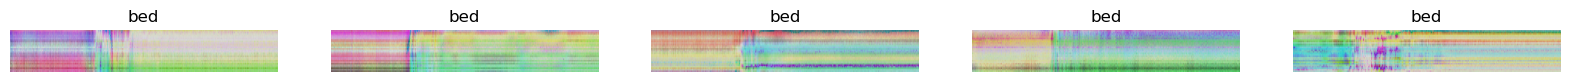

Epoch 1/50
14/14 [==============================] - 41s 3s/step - loss: 4.7684 - accuracy: 0.1551 - precision: 0.4549 - recall: 0.1903 - val_loss: 1.9093 - val_accuracy: 0.2232 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
14/14 [==============================] - 35s 3s/step - loss: 1.8805 - accuracy: 0.2270 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.8296 - val_accuracy: 0.2857 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
14/14 [==============================] - 39s 3s/step - loss: 1.6247 - accuracy: 0.3910 - precision: 0.5769 - recall: 0.0337 - val_loss: 1.4977 - val_accuracy: 0.3929 - val_precision: 0.5714 - val_recall: 0.1429
Epoch 4/50
14/14 [==============================] - 36s 3s/step - loss: 1.0941 - accuracy: 0.6360 - precision: 0.7874 - recall: 0.4494 - val_loss: 1.4125 - val_accuracy: 0.5536 - val_precision: 0.5952 - val_recall: 0.4464
Epoch 5/50
14/14 [==============================] - 37s 3s/step - loss: 0.7706 - accurac

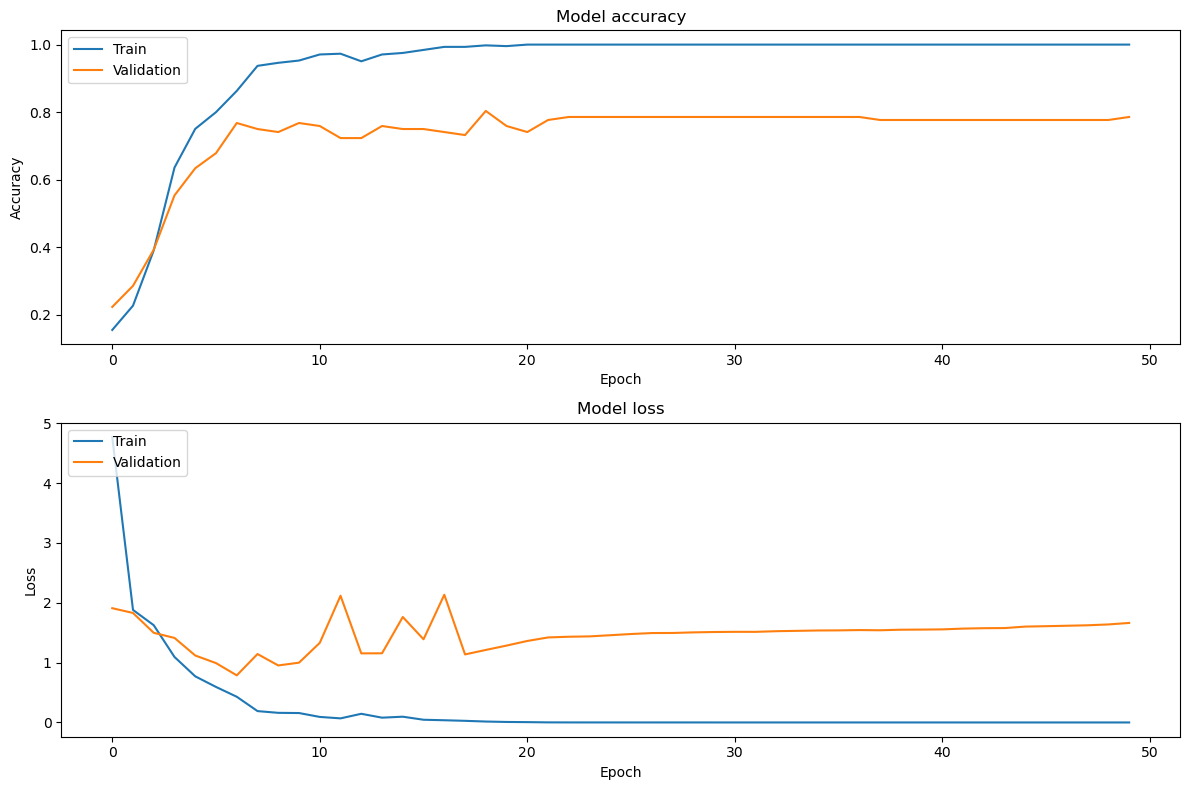

4/4 [==============================] - 2s 375ms/step - loss: 1.6630 - accuracy: 0.7857 - precision: 0.7857 - recall: 0.7857
Test accuracy: 0.7857142686843872
Test precision: 0.7857142686843872
Test recall: 0.7857142686843872
Test F1 Score: 0.7857142686843872


In [12]:
# Initial Model #

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')
combined_images, labels = load_and_merge_images(folder_path)
labels_one_hot = encode_labels(labels)

# Shuffle your data before splitting
combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)


visualize_samples(combined_images[:5], labels[:5])

num_classes = 7
num_epochs = 50
batch_size = 32

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=combined_images[0].shape))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', precision_metric, recall_metric])


history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size, validation_data=(combined_images_test, labels_test))


plot_training_history(history)

# Evaluate the model
evaluate_model(model, combined_images_test, labels_test)

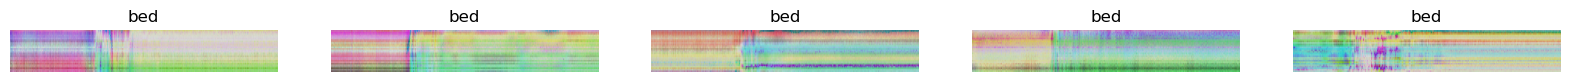

Epoch 1/50
14/14 [==============================] - 39s 3s/step - loss: 2.3577 - accuracy: 0.1618 - precision_2: 0.1607 - recall_2: 0.0202 - val_loss: 1.9357 - val_accuracy: 0.2143 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/50
14/14 [==============================] - 35s 2s/step - loss: 1.8475 - accuracy: 0.3483 - precision_2: 0.3333 - recall_2: 0.0022 - val_loss: 1.7144 - val_accuracy: 0.4196 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/50
14/14 [==============================] - 33s 2s/step - loss: 1.4780 - accuracy: 0.4899 - precision_2: 0.8554 - recall_2: 0.1596 - val_loss: 1.4617 - val_accuracy: 0.4464 - val_precision_2: 0.6727 - val_recall_2: 0.3304
Epoch 4/50
14/14 [==============================] - 35s 3s/step - loss: 1.1081 - accuracy: 0.6494 - precision_2: 0.7890 - recall_2: 0.4202 - val_loss: 1.2656 - val_accuracy: 0.5625 - val_precision_2: 0.8200 - val_recall_2: 0.3661
Epoch 5/50
14/14 [==============================] - 34s 2s/step 

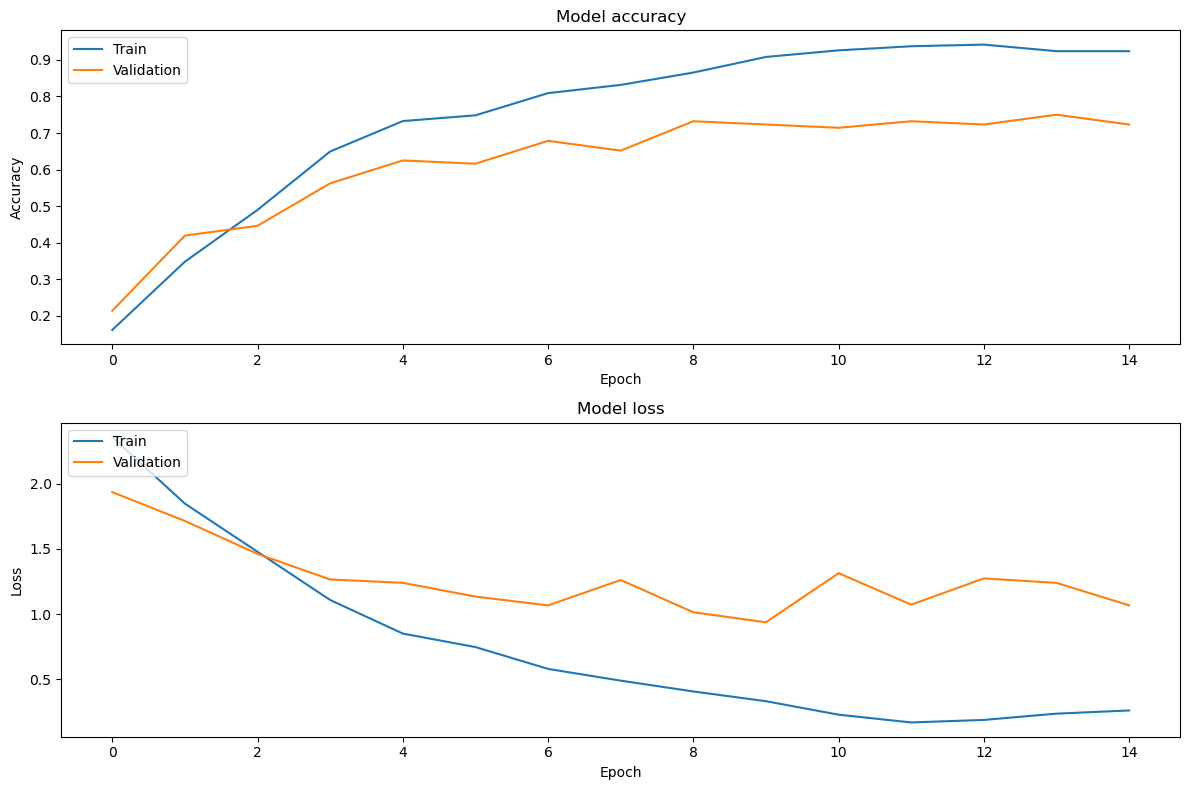

4/4 [==============================] - 2s 412ms/step - loss: 1.0669 - accuracy: 0.7232 - precision_2: 0.7500 - recall_2: 0.6964
Test accuracy: 0.7232142686843872
Test precision: 0.75
Test recall: 0.6964285969734192
Test F1 Score: 0.7222222359582718


In [10]:
#more simple mode to try decrease overfitting

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')
combined_images, labels = load_and_merge_images(folder_path)
labels_one_hot = encode_labels(labels)

# Shuffle your data before splitting
combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

visualize_samples(combined_images[:5], labels[:5])

num_classes = 7
num_epochs = 50
batch_size = 32

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=combined_images[0].shape))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))  # Reduced number of filters
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))  # Added dropout layer
model.add(keras.layers.Dense(32, activation='relu'))  # Reduced number of neurons
model.add(keras.layers.Dense(num_classes, activation='softmax'))


#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', precision_metric, recall_metric])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), 
tf.keras.metrics.Recall()])


# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping])


plot_training_history(history)

# Evaluate the model
evaluate_model(model, combined_images_test, labels_test)

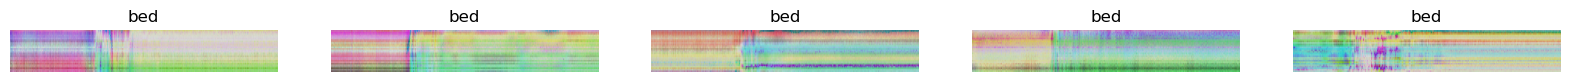

Epoch 1/50
14/14 [==============================] - 31s 2s/step - loss: 2.6613 - accuracy: 0.1730 - precision_1: 0.1296 - recall_1: 0.0157 - val_loss: 1.8676 - val_accuracy: 0.2768 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/50
14/14 [==============================] - 30s 2s/step - loss: 1.7220 - accuracy: 0.3708 - precision_1: 0.8889 - recall_1: 0.0180 - val_loss: 1.5218 - val_accuracy: 0.3571 - val_precision_1: 0.7500 - val_recall_1: 0.1875
Epoch 3/50
14/14 [==============================] - 30s 2s/step - loss: 1.3103 - accuracy: 0.5011 - precision_1: 0.6923 - recall_1: 0.3438 - val_loss: 1.5017 - val_accuracy: 0.4911 - val_precision_1: 0.6667 - val_recall_1: 0.2143
Epoch 4/50
14/14 [==============================] - 29s 2s/step - loss: 1.1232 - accuracy: 0.6112 - precision_1: 0.8462 - recall_1: 0.3955 - val_loss: 1.3081 - val_accuracy: 0.5625 - val_precision_1: 0.7377 - val_recall_1: 0.4018
Epoch 5/50
14/14 [==============================] - 31s 2s/step - loss: 

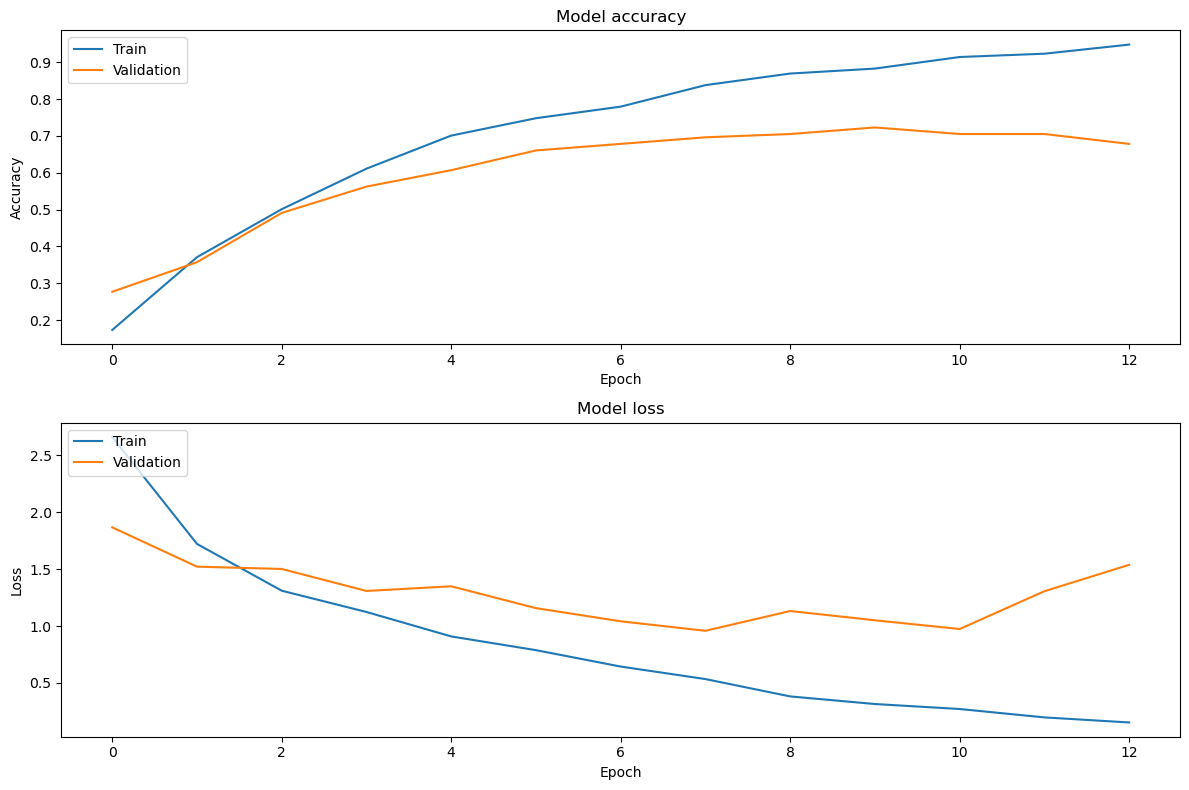

4/4 [==============================] - 2s 418ms/step - loss: 1.5381 - accuracy: 0.6786 - precision_1: 0.6990 - recall_1: 0.6429
Test accuracy: 0.6785714030265808
Test precision: 0.6990291476249695
Test recall: 0.6428571343421936
Test F1 Score: 0.669767447067248


In [9]:
# updated code with a dropout rate of 0.6: 


folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')
combined_images, labels = load_and_merge_images(folder_path)
labels_one_hot = encode_labels(labels)

# Shuffle your data before splitting
combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

visualize_samples(combined_images[:5], labels[:5])

num_classes = 7
num_epochs = 50
batch_size = 32

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=combined_images[0].shape))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))  # Reduced number of filters
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.6))  # Increased dropout rate
model.add(keras.layers.Dense(32, activation='relu'))  # Reduced number of neurons
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), 
tf.keras.metrics.Recall()])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping])


plot_training_history(history)

# Evaluate the model
evaluate_model(model, combined_images_test, labels_test)


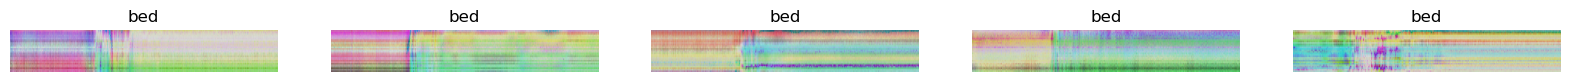

Epoch 1/50
14/14 [==============================] - 44s 3s/step - loss: 2.0900 - accuracy: 0.2315 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_loss: 1.7497 - val_accuracy: 0.3482 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - lr: 0.0010
Epoch 2/50
14/14 [==============================] - 36s 3s/step - loss: 1.5448 - accuracy: 0.4382 - precision_4: 0.7238 - recall_4: 0.1708 - val_loss: 1.5859 - val_accuracy: 0.3929 - val_precision_4: 0.5500 - val_recall_4: 0.1964 - lr: 0.0010
Epoch 3/50
14/14 [==============================] - 35s 3s/step - loss: 1.0961 - accuracy: 0.6449 - precision_4: 0.7683 - recall_4: 0.4247 - val_loss: 1.1355 - val_accuracy: 0.6250 - val_precision_4: 0.6627 - val_recall_4: 0.4911 - lr: 0.0010
Epoch 4/50
14/14 [==============================] - 35s 3s/step - loss: 0.7241 - accuracy: 0.7685 - precision_4: 0.8430 - recall_4: 0.6876 - val_loss: 0.9243 - val_accuracy: 0.6518 - val_precision_4: 0.7442 - val_recall_4: 0.5714 - lr: 0.0010
Epoch 5/50
1

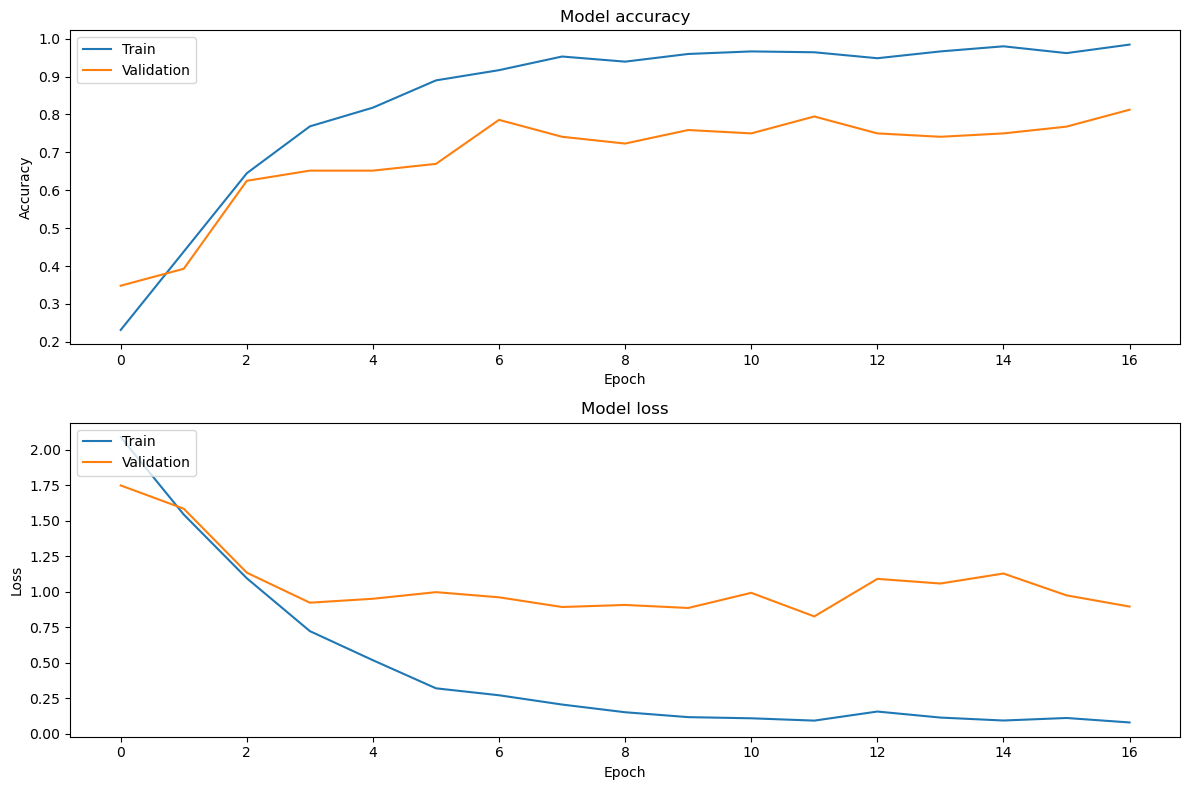

4/4 [==============================] - 2s 356ms/step - loss: 0.8970 - accuracy: 0.8125 - precision_4: 0.8108 - recall_4: 0.8036
Test accuracy: 0.8125
Test precision: 0.8108108043670654
Test recall: 0.8035714030265808
Test F1 Score: 0.8071748718121032


In [13]:
#LEts try add learning rate scheduling 

# Improved Model #

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')
combined_images, labels = load_and_merge_images(folder_path)
labels_one_hot = encode_labels(labels)


# Shuffle your data before splitting
combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

visualize_samples(combined_images[:5], labels[:5])

num_classes = 7
num_epochs = 50
batch_size = 32

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=combined_images[0].shape))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))  # Reduced number of filters
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.6))  # Increased dropout rate
model.add(keras.layers.Dense(32, activation='relu'))  # Reduced number of neurons
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), 
tf.keras.metrics.Recall()])

# Define the learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Update model.fit() to include learning rate scheduler in the callbacks
history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping, reduce_lr])

plot_training_history(history)

# Evaluate the model
evaluate_model(model, combined_images_test, labels_test)



# ResNet

Epoch 1/50
14/14 [==============================] - 136s 9s/step - loss: 70.8669 - accuracy: 0.1393 - precision: 0.1369 - recall: 0.1326 - val_loss: 9.9228 - val_accuracy: 0.0804 - val_precision: 0.0734 - val_recall: 0.0714
Epoch 2/50
14/14 [==============================] - 101s 7s/step - loss: 10.2807 - accuracy: 0.1281 - precision: 0.1410 - recall: 0.0989 - val_loss: 1.9466 - val_accuracy: 0.1339 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
14/14 [==============================] - 99s 7s/step - loss: 2.0696 - accuracy: 0.1528 - precision: 0.0714 - recall: 0.0022 - val_loss: 1.9441 - val_accuracy: 0.1339 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
14/14 [==============================] - 101s 7s/step - loss: 1.9456 - accuracy: 0.1303 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.9483 - val_accuracy: 0.1339 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
14/14 [==============================] - 99s 7s/step - loss: 1.9

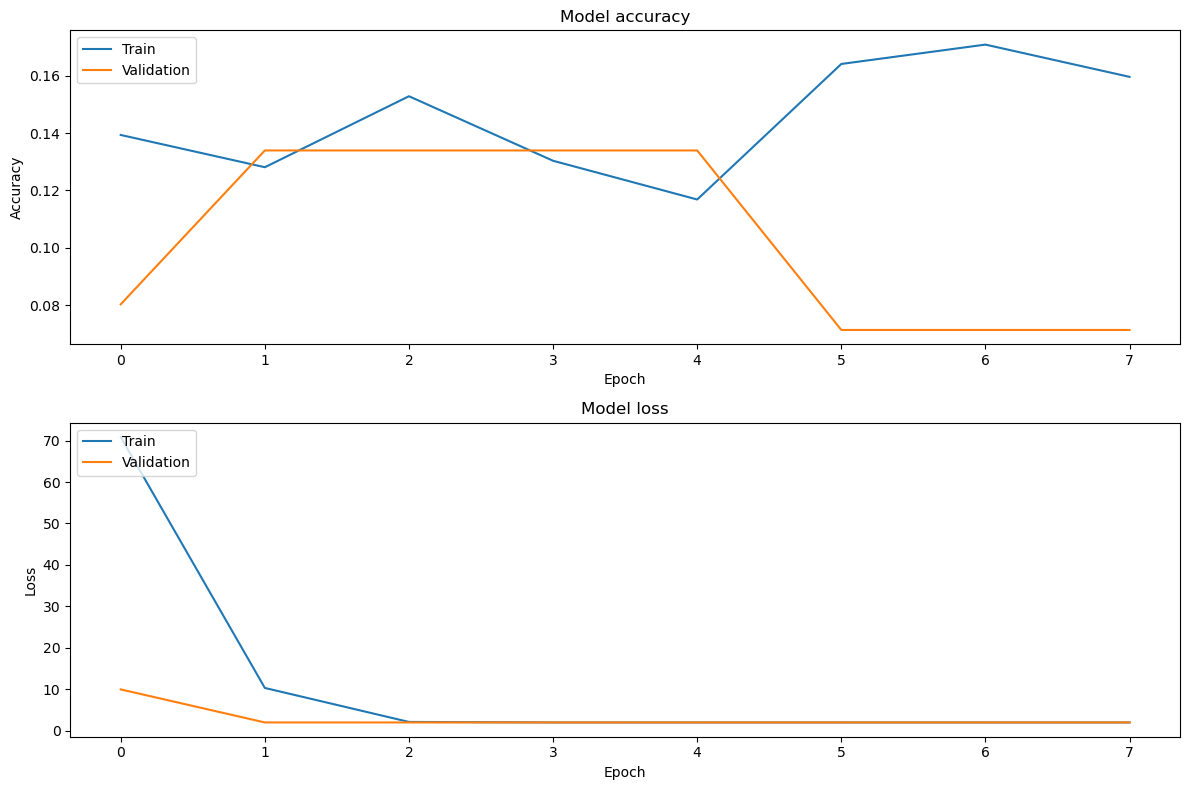

4/4 [==============================] - 12s 3s/step - loss: 1.9529 - accuracy: 0.0714 - precision: 0.0000e+00 - recall: 0.0000e+00
Test accuracy: 0.0714285746216774
Test precision: 0.0
Test recall: 0.0
Test F1 Score: 0


In [3]:

#using resnet model pretrained#


folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')
combined_images, labels = load_and_merge_images(folder_path)
labels_one_hot = encode_labels(labels)

# Shuffle your data before splitting
combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)


visualize_samples(combined_images[:5], labels[:5])


num_classes = 7
num_epochs = 50
batch_size = 32

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=combined_images[0].shape)

# Add a new top layer
x = base_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1024, activation='relu')(x) # dense layer 1
x = keras.layers.Dropout(0.5)(x) # to avoid overfitting
x = keras.layers.Dense(1024, activation='relu')(x) # dense layer 2
x = keras.layers.Dropout(0.5)(x) # to avoid overfitting
predictions = keras.layers.Dense(num_classes, activation='softmax')(x) # final layer with softmax activation

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), 
tf.keras.metrics.Recall()])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping])

plot_training_history(history)

# Evaluate the model
evaluate_model(model, combined_images_test, labels_test)


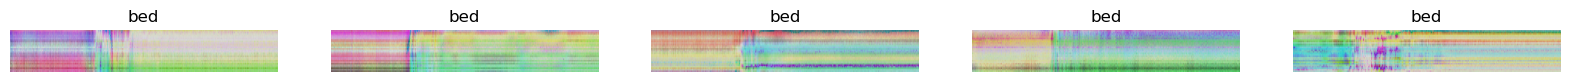

Epoch 1/50
14/14 [==============================] - 5s 293ms/step - loss: 56.2256 - accuracy: 0.1348 - precision_1: 0.1335 - recall_1: 0.1236 - val_loss: 24.2064 - val_accuracy: 0.2321 - val_precision_1: 0.2321 - val_recall_1: 0.2321 - lr: 0.0010
Epoch 2/50
14/14 [==============================] - 4s 272ms/step - loss: 25.9162 - accuracy: 0.1888 - precision_1: 0.1896 - recall_1: 0.1888 - val_loss: 21.0870 - val_accuracy: 0.2232 - val_precision_1: 0.2232 - val_recall_1: 0.2232 - lr: 0.0010
Epoch 3/50
14/14 [==============================] - 4s 272ms/step - loss: 21.4184 - accuracy: 0.1888 - precision_1: 0.1839 - recall_1: 0.1798 - val_loss: 15.5948 - val_accuracy: 0.1607 - val_precision_1: 0.1607 - val_recall_1: 0.1607 - lr: 0.0010
Epoch 4/50
14/14 [==============================] - 4s 272ms/step - loss: 16.3678 - accuracy: 0.2000 - precision_1: 0.2018 - recall_1: 0.1978 - val_loss: 9.4607 - val_accuracy: 0.2589 - val_precision_1: 0.2636 - val_recall_1: 0.2589 - lr: 0.0010
Epoch 5/50
14

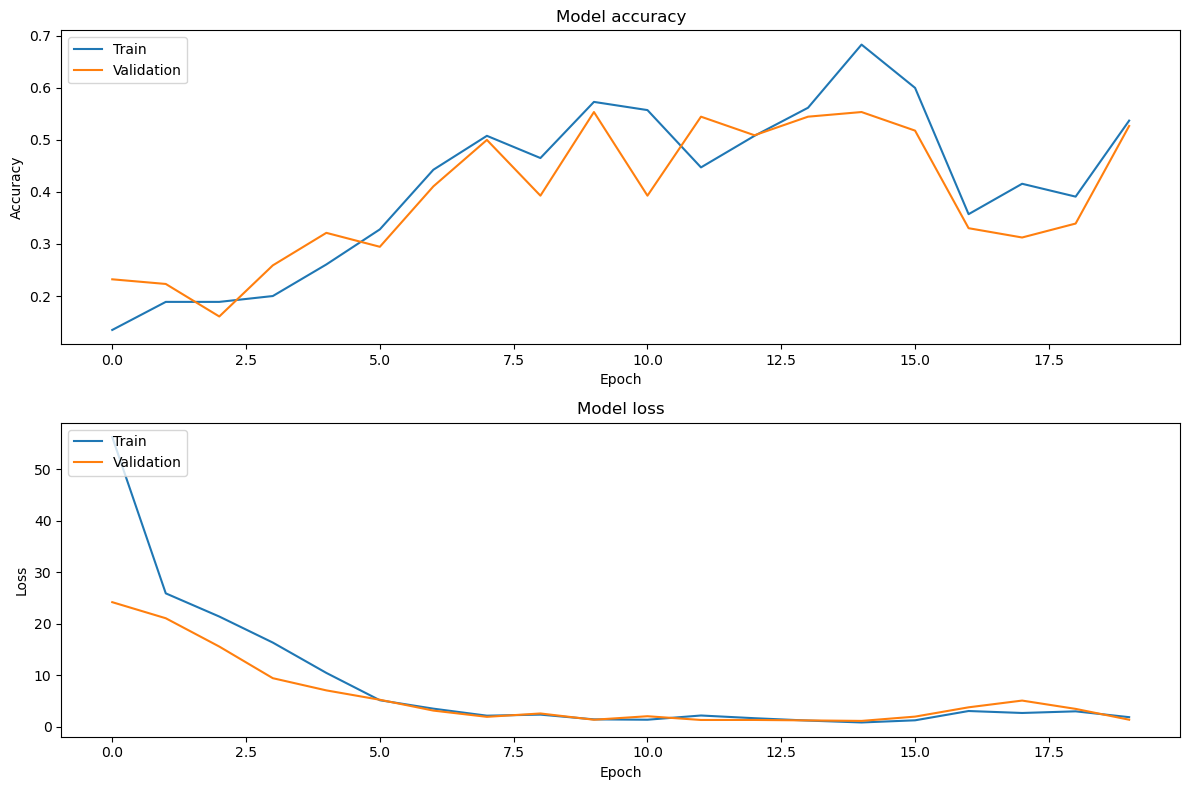

4/4 [==============================] - 0s 15ms/step - loss: 1.4061 - accuracy: 0.5268 - precision_1: 0.5714 - recall_1: 0.5000
Test accuracy: 0.5267857313156128
Test precision: 0.5714285969734192
Test recall: 0.5
Test F1 Score: 0.5333333444595334


In [5]:

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')
combined_images, labels = load_and_merge_images(folder_path)
labels_one_hot = encode_labels(labels)
# Shuffle your data before splitting
combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

# Reshape the data to 1D for Dense Network
combined_images_train = combined_images_train.reshape(combined_images_train.shape[0], -1)
combined_images_test = combined_images_test.reshape(combined_images_test.shape[0], -1)


visualize_samples(combined_images[:5], labels[:5])

num_classes = 7
num_epochs = 50
batch_size = 32

model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(combined_images_train.shape[1],)))
model.add(keras.layers.Dense(32, activation='relu')) 
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), 
tf.keras.metrics.Recall()])

# Define the learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Update model.fit() to include learning rate scheduler in the callbacks
history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping, reduce_lr])


plot_training_history(history)

# Evaluate the model
evaluate_model(model, combined_images_test, labels_test)


 data and task may be better suited to the spatial inductive biases of a CNN as opposed to a Dense Network.

A CNN takes advantage of the spatial structure of the data, such as images where pixels closer to each other are more likely to be semantically related. Dense networks do not have this property and treat all inputs independently, which may be less efficient or effective if there is a spatial or temporal structure in  data.


# InceptionV3 model

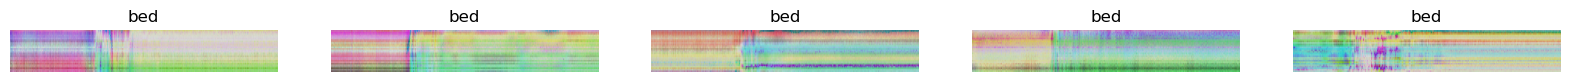

Epoch 1/50
14/14 [==============================] - 32s 2s/step - loss: 3.1684 - accuracy: 0.2090 - precision_2: 0.2482 - recall_2: 0.1573 - val_loss: 1.8647 - val_accuracy: 0.2946 - val_precision_2: 0.6087 - val_recall_2: 0.1250 - lr: 0.0010
Epoch 2/50
14/14 [==============================] - 28s 2s/step - loss: 1.8678 - accuracy: 0.3124 - precision_2: 0.4114 - recall_2: 0.1618 - val_loss: 1.5869 - val_accuracy: 0.3214 - val_precision_2: 0.6538 - val_recall_2: 0.1518 - lr: 0.0010
Epoch 3/50
14/14 [==============================] - 28s 2s/step - loss: 1.4095 - accuracy: 0.4809 - precision_2: 0.7500 - recall_2: 0.2427 - val_loss: 1.4201 - val_accuracy: 0.5625 - val_precision_2: 0.9130 - val_recall_2: 0.1875 - lr: 0.0010
Epoch 4/50
14/14 [==============================] - 28s 2s/step - loss: 1.2329 - accuracy: 0.5730 - precision_2: 0.7740 - recall_2: 0.3079 - val_loss: 1.4005 - val_accuracy: 0.4643 - val_precision_2: 0.7250 - val_recall_2: 0.2589 - lr: 0.0010
Epoch 5/50
14/14 [==========

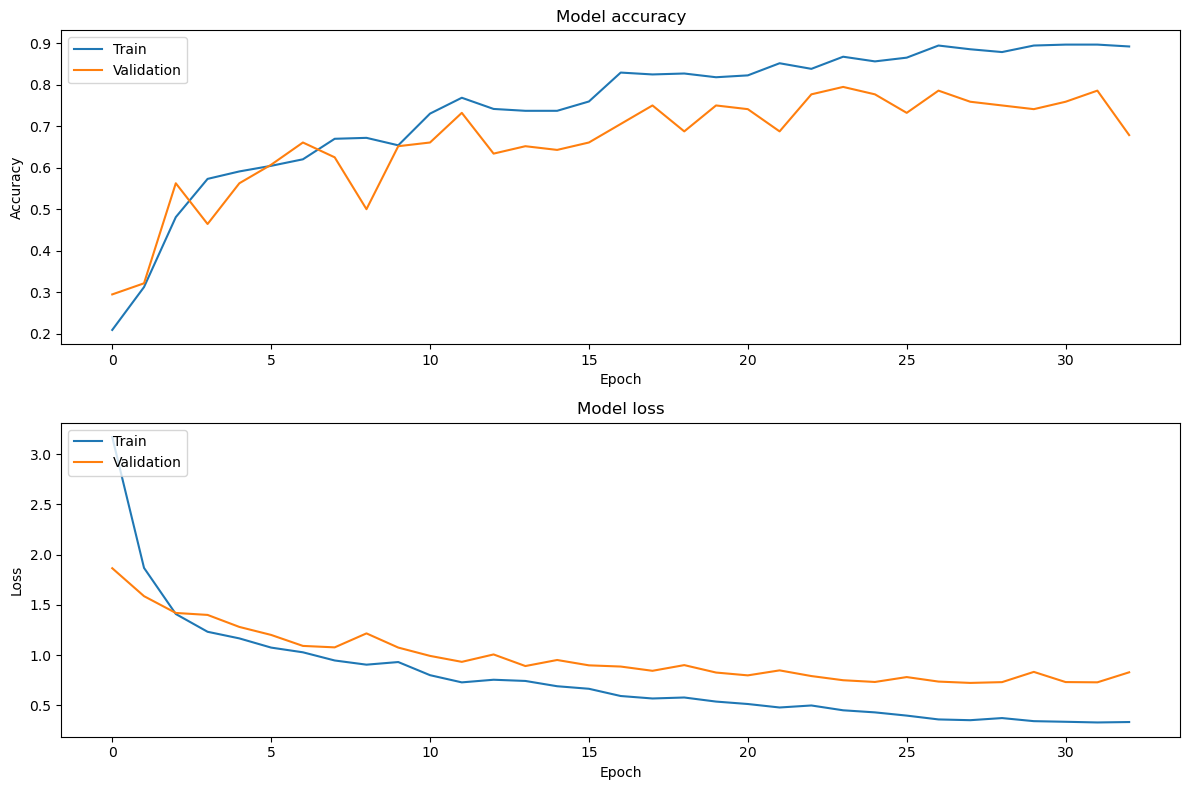

4/4 [==============================] - 6s 1s/step - loss: 0.8299 - accuracy: 0.6786 - precision_2: 0.8132 - recall_2: 0.6607
Test accuracy: 0.6785714030265808
Test precision: 0.8131868243217468
Test recall: 0.6607142686843872
Test F1 Score: 0.7290640335162384


In [6]:


folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')
combined_images, labels = load_and_merge_images(folder_path)
labels_one_hot = encode_labels(labels)



# Shuffle your data before splitting
combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

visualize_samples(combined_images[:5], labels[:5])

num_classes = 7
num_epochs = 50
batch_size = 32

# Load the InceptionV3 model without its final fully connected layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=combined_images[0].shape)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a dropout layer for regularization
x = keras.layers.Dropout(0.6)(x)

# Add a logistic layer with the number of classes we have
predictions = Dense(num_classes, activation='softmax')(x)

# Construct the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Only train the top layers (which were randomly initialized)
# i.e. freeze all InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), 
tf.keras.metrics.Recall()])

# Define the learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Update model.fit() to include learning rate scheduler in the callbacks
history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping, reduce_lr])



plot_training_history(history)

# Evaluate the model
evaluate_model(model, combined_images_test, labels_test)

# Xception

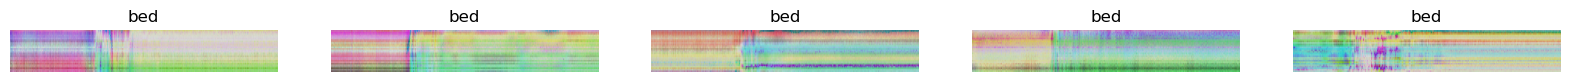

Epoch 1/50
14/14 [==============================] - 56s 4s/step - loss: 1.8032 - accuracy: 0.3146 - precision_3: 0.6667 - recall_3: 0.0674 - val_loss: 1.4914 - val_accuracy: 0.3661 - val_precision_3: 1.0000 - val_recall_3: 0.0893 - lr: 0.0010
Epoch 2/50
14/14 [==============================] - 54s 4s/step - loss: 1.3173 - accuracy: 0.5191 - precision_3: 0.7133 - recall_3: 0.2292 - val_loss: 1.3236 - val_accuracy: 0.4643 - val_precision_3: 0.8077 - val_recall_3: 0.1875 - lr: 0.0010
Epoch 3/50
14/14 [==============================] - 56s 4s/step - loss: 1.1235 - accuracy: 0.5528 - precision_3: 0.7624 - recall_3: 0.3461 - val_loss: 1.2194 - val_accuracy: 0.5714 - val_precision_3: 0.8571 - val_recall_3: 0.2679 - lr: 0.0010
Epoch 4/50
14/14 [==============================] - 56s 4s/step - loss: 0.9699 - accuracy: 0.6449 - precision_3: 0.8117 - recall_3: 0.4360 - val_loss: 1.1335 - val_accuracy: 0.6429 - val_precision_3: 0.9348 - val_recall_3: 0.3839 - lr: 0.0010
Epoch 5/50
14/14 [==========

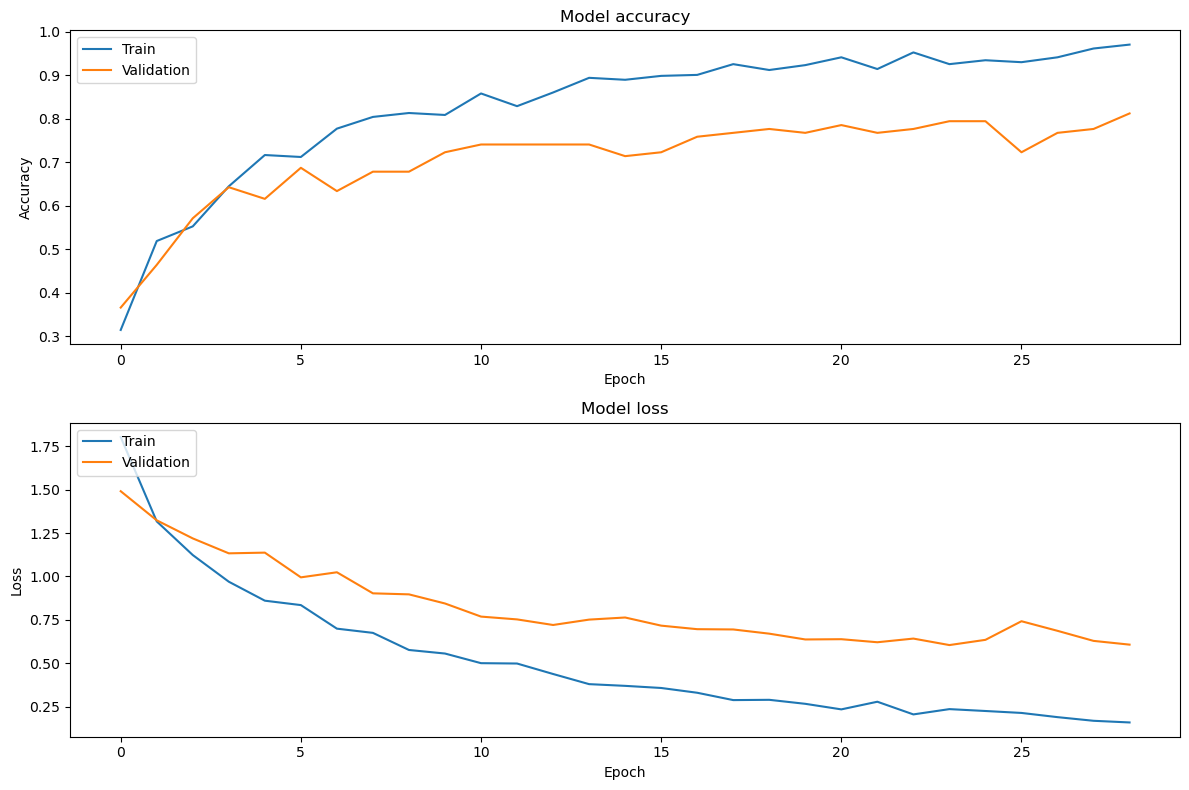

4/4 [==============================] - 12s 3s/step - loss: 0.6073 - accuracy: 0.8125 - precision_3: 0.8485 - recall_3: 0.7500
Test accuracy: 0.8125
Test precision: 0.8484848737716675
Test recall: 0.75
Test F1 Score: 0.7962085419391347


In [8]:


folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')
combined_images, labels = load_and_merge_images(folder_path)
labels_one_hot = encode_labels(labels)



combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

visualize_samples(combined_images[:5], labels[:5])

num_classes = 7
num_epochs = 50
batch_size = 32

base_model = Xception(weights='imagenet', include_top=False, input_shape=combined_images[0].shape)  # Load Xception

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.6)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.Precision(), 
tf.keras.metrics.Recall()])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping, reduce_lr])


plot_training_history(history)

# Evaluate the model
evaluate_model(model, combined_images_test, labels_test)


# Mobile Net

In [ ]:


folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')
combined_images, labels = load_and_merge_images(folder_path)
labels_one_hot = encode_labels(labels)



combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

visualize_samples(combined_images[:5], labels[:5])

num_classes = 7
num_epochs = 50
batch_size = 32

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=combined_images[0].shape)  # Load MobileNet

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.6)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), 
tf.keras.metrics.Recall()])

# First train the model with new layers
history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size, validation_data=(combined_images_test, labels_test))

# Unfreeze some layers for fine-tuning
for layer in model.layers[:-10]:
    layer.trainable = False
for layer in model.layers[-10:]:
    layer.trainable = True

model.compile(optimizer=keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), 
tf.keras.metrics.Recall()])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping, reduce_lr])


plot_training_history(history)

# Evaluate the model
evaluate_model(model, combined_images_test, labels_test)


In [ ]:


folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')
combined_images, labels = load_and_merge_images(folder_path)
labels_one_hot = encode_labels(labels)



combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

visualize_samples(combined_images[:5], labels[:5])

num_classes = 7
num_epochs = 50
batch_size = 32

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=combined_images[0].shape)  # Load MobileNet

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.6)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), 
tf.keras.metrics.Recall()])

# First train the model with new layers
history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size, validation_data=(combined_images_test, labels_test))

# Unfreeze some layers for fine-tuning
for layer in model.layers[:-10]:
    layer.trainable = False
for layer in model.layers[-10:]:
    layer.trainable = True

model.compile(optimizer=keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), 
tf.keras.metrics.Recall()])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping, reduce_lr])



plot_training_history(history)

# Evaluate the model
evaluate_model(model, combined_images_test, labels_test)

 switch from Adam optimizer to RMSprop

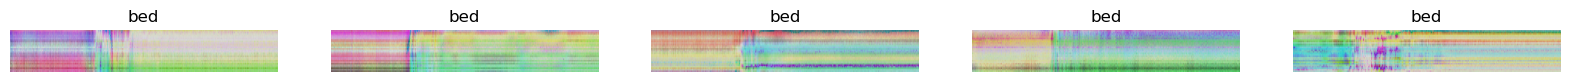

Epoch 1/50
14/14 [==============================] - 20s 1s/step - loss: 2.5520 - accuracy: 0.2607 - precision_6: 0.3020 - recall_6: 0.1730 - val_loss: 1.7865 - val_accuracy: 0.3304 - val_precision_6: 0.4091 - val_recall_6: 0.1607
Epoch 2/50
14/14 [==============================] - 16s 1s/step - loss: 1.3826 - accuracy: 0.5056 - precision_6: 0.6494 - recall_6: 0.3663 - val_loss: 1.3681 - val_accuracy: 0.4375 - val_precision_6: 0.6087 - val_recall_6: 0.2500
Epoch 3/50
14/14 [==============================] - 16s 1s/step - loss: 1.2318 - accuracy: 0.5461 - precision_6: 0.6617 - recall_6: 0.4000 - val_loss: 1.1998 - val_accuracy: 0.5536 - val_precision_6: 0.8723 - val_recall_6: 0.3661
Epoch 4/50
14/14 [==============================] - 16s 1s/step - loss: 1.0855 - accuracy: 0.5933 - precision_6: 0.7285 - recall_6: 0.4764 - val_loss: 1.0414 - val_accuracy: 0.6339 - val_precision_6: 0.7869 - val_recall_6: 0.4286
Epoch 5/50
14/14 [==============================] - 16s 1s/step - loss: 0.8935 -

Epoch 36/50
14/14 [==============================] - 17s 1s/step - loss: 0.1666 - accuracy: 0.9326 - precision_6: 0.9450 - recall_6: 0.9258 - val_loss: 0.7922 - val_accuracy: 0.7589 - val_precision_6: 0.7778 - val_recall_6: 0.7500
Epoch 37/50
14/14 [==============================] - 16s 1s/step - loss: 0.1487 - accuracy: 0.9371 - precision_6: 0.9453 - recall_6: 0.9326 - val_loss: 0.7216 - val_accuracy: 0.8036 - val_precision_6: 0.8381 - val_recall_6: 0.7857
Epoch 38/50
14/14 [==============================] - 16s 1s/step - loss: 0.1160 - accuracy: 0.9573 - precision_6: 0.9592 - recall_6: 0.9506 - val_loss: 0.9654 - val_accuracy: 0.6964 - val_precision_6: 0.7238 - val_recall_6: 0.6786
Epoch 39/50
14/14 [==============================] - 16s 1s/step - loss: 0.1516 - accuracy: 0.9483 - precision_6: 0.9525 - recall_6: 0.9461 - val_loss: 0.9835 - val_accuracy: 0.6964 - val_precision_6: 0.7222 - val_recall_6: 0.6964
Epoch 40/50
14/14 [==============================] - 17s 1s/step - loss: 0.1

In [ ]:


folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')
combined_images, labels = load_and_merge_images(folder_path)
labels_one_hot = encode_labels(labels)



combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)
visualize_samples(combined_images[:5], labels[:5])

num_classes = 7
num_epochs = 50
batch_size = 32

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=combined_images[0].shape)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.6)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), 
tf.keras.metrics.Recall()])

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size, validation_data=(combined_images_test, labels_test))

for layer in model.layers[:-10]:
    layer.trainable = False
for layer in model.layers[-10:]:
    layer.trainable = True

model.compile(optimizer=keras.optimizers.RMSprop(1e-5), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), 
tf.keras.metrics.Recall()])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping, reduce_lr])


plot_training_history(history)

# Evaluate the model
evaluate_model(model, combined_images_test, labels_test)